In [399]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
from PIL import Image
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
import time
import copy
import os


In [400]:
train_data_dir = '/Users/k.stavrianos/PycharmProjects/EmotionDetection/dataset/train_set/'
valid_data_dir = '/Users/k.stavrianos/PycharmProjects/EmotionDetection/dataset/val_set/'

In [401]:
class train_dataset(Dataset):
    def __init__(self, folder):
        neutral = glob(folder + '/0/*')
        happiness = glob(folder + '/1/*')
        sadness = glob(folder + '/2/*')
        surprise = glob(folder + '/3/*')
        fear = glob(folder + '/4/*')
        disgust = glob(folder + '/5/*')
        anger = glob(folder + '/6/*')
        contempt = glob(folder + '/7/*')
        self.fpaths = neutral[:200] + happiness[:200] + sadness[:200] + surprise[:200] + fear[:200] + disgust[:200] + anger[:200] + contempt[:200]
        self.normalize = transforms.Normalize(mean=[0.485, 
                   0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = []
        for fpath in self.fpaths:
            if fpath.split('/')[-1].startswith('0'):
                self.targets.append(0)
            elif fpath.split('/')[-1].startswith('1'):
                self.targets.append(1)
            elif fpath.split('/')[-1].startswith('2'):
                self.targets.append(2)
            elif fpath.split('/')[-1].startswith('3'):
                self.targets.append(3)
            elif fpath.split('/')[-1].startswith('4'):
                self.targets.append(4)
            elif fpath.split('/')[-1].startswith('5'):
                self.targets.append(5)
            elif fpath.split('/')[-1].startswith('6'):
                self.targets.append(6)
            else:
                self.targets.append(7)         
                  
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im) 
        return im.float().to(device),torch.tensor([target]).float().to(device)

In [402]:
class test_dataset(Dataset):
    def __init__(self, folder):
        neutral = glob(folder + '/0/*')
        happiness = glob(folder + '/1/*')
        sadness = glob(folder + '/2/*')
        surprise = glob(folder + '/3/*')
        fear = glob(folder + '/4/*')
        disgust = glob(folder + '/5/*')
        anger = glob(folder + '/6/*')
        contempt = glob(folder + '/7/*')
        self.fpaths = neutral[:300] + happiness[:300] + sadness[:300] + surprise[:300] + fear[:300] + disgust[:300] + anger[:300] + contempt[:300]
        self.normalize = transforms.Normalize(mean=[0.485, 
                   0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = []
        for fpath in self.fpaths:
            if fpath.split('/')[-1].startswith('0'):
                self.targets.append(0)
            elif fpath.split('/')[-1].startswith('1'):
                self.targets.append(1)
            elif fpath.split('/')[-1].startswith('2'):
                self.targets.append(2)
            elif fpath.split('/')[-1].startswith('3'):
                self.targets.append(3)
            elif fpath.split('/')[-1].startswith('4'):
                self.targets.append(4)
            elif fpath.split('/')[-1].startswith('5'):
                self.targets.append(5)
            elif fpath.split('/')[-1].startswith('6'):
                self.targets.append(6)
            else:
                self.targets.append(7)         
                  
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im) 
        return im.float().to(device),torch.tensor([target]).float().to(device)

In [403]:
train_data = train_dataset(train_data_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([2.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([1.])
tensor([7.])
tensor([1.])
tensor([3.])
tensor([1.])
tensor([1.])
tensor([7.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([1.])
tensor([3.])
tensor([3.])
tensor([4.])
tensor([1.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([4.])
tensor([2.])
tensor([2.])
tensor([1.])
tensor([3.])
tensor([6.])
tensor([1.])
tensor([1.])
tensor([7.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([2.])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([3.])
tensor([2.])
tensor([2.])
tensor([3.])
tensor([3.])
tensor([3.])
tensor([1.])
tensor([7.])
tensor([3.])
tensor([4.])
tensor([1.])
tensor([3.])
tensor([2.])
tensor([6.])
tensor([2.])
tensor([1.])
tensor([3.])
tensor([3.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([1.])
tensor([4.])
tensor([3.])
tensor([1.])
tensor([2.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([2.])
tensor([3.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([1.])
tensor([1.])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([3.])
tensor([3.])
tensor([2.])
tensor([3.])
tensor([7.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([2.])
tensor([7.])
tensor([4.])
tensor([3.])
tensor([7.])
tensor([7.])
tensor([2.])
tensor([1.])
tensor([2.])
tensor([7.])
tensor([7.])
tensor([2.])
tensor([3.])
tensor([2.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])


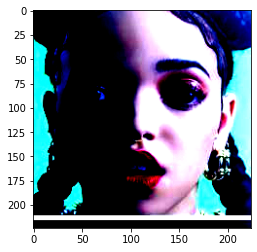

In [404]:
for i in range(100):
    im, label = train_data[i]
    plt.imshow(im.permute(1,2,0).cpu())
    print(label)

In [405]:
len(train_data)

1600

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2.])


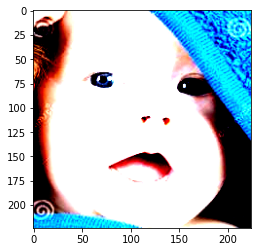

In [406]:
im, label = train_data[50]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [407]:
def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
                             
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.2), 
                             
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
                             
    nn.Linear(128, 8))
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)
    return model.to(device), loss_fn, optimizer

In [408]:
#!pip install torch_summary
from torchsummary import summary
model, criterion, optimizer = get_model()

In [409]:
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

In [410]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y.squeeze_().type(torch.LongTensor))
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [411]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [412]:
@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y.squeeze_().type(torch.LongTensor))
    return val_loss.item()

In [413]:
def get_data(data_dir_train, data_dir_valid):     
    dataset_train = train_dataset(data_dir_train)
    dataset_valid = test_dataset(data_dir_valid)
    shuffle_dataset = True
    random_seed = 42
    
    dataset_train_size = len(dataset_train)
    dataset_valid_size = len(dataset_valid)
    train_indices = list(range(dataset_train_size))
    valid_indices = list(range(dataset_valid_size))
    if shuffle_dataset:
        np.random.seed(random_seed)
        np.random.shuffle(train_indices)
    train_indices = train_indices[:]
    valid_indices = valid_indices[:]
    
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(valid_indices)
    
    
    trn_dl = DataLoader(dataset_train, batch_size=32, drop_last = True, sampler = train_sampler)
    val_dl = DataLoader(dataset_valid, batch_size=32, drop_last = True, sampler = valid_sampler)
    
    return trn_dl, val_dl

In [414]:
trn_dl, val_dl = get_data(train_data_dir, valid_data_dir)
model, loss_fn, optimizer = get_model()

In [415]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [416]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(15):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


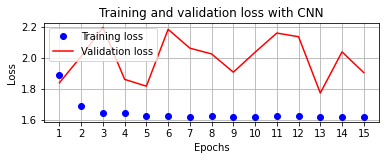

/var/folders/bh/n2qffgj57bsgvhpmlm572jpm0000gn/T/ipykernel_82160/2522302355.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


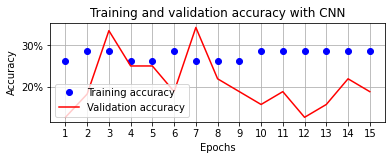

In [417]:
epochs = np.arange(15)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [419]:
torch.save(model.state_dict(), './models/emotion_detection_model_state_3.pth')